# Diabetes Prediction

This Jupyter notebook presents a Diabetes prediction model using the K-Nearest Neighbors (KNN) algorithm. The dataset used for this project was sourced from Kaggle and is originally provided by the National Institute of Diabetes and Digestive and Kidney Diseases.

## Dataset Description

The dataset consists of several predictive variables along with an outcome variable that indicates whether a person has diabetes. The variables include various health metrics and personal information gathered from multiple patients, which are used to classify individuals as diabetic or non-diabetic.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: A function that scores likelihood of diabetes based on family history
- Age: Age (years)
- Outcome: Class variable (0: non-diabetic, 1: diabetic)
- The dataset can be accessed and downloaded from Kaggle.

Dataset - https://www.kaggle.com/datasets/abdallamahgoub/diabetes?resource=download

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from itertools import combinations
import pickle

### Import Data 

In [2]:
data = pd.DataFrame(pd.read_csv("./diabetes.csv"))

### Manipulation and Cleaning of Dataset

In [3]:
# Clean Dataset for missing values and zeros
# Replace it with mean of that feature 
# NOTE: Not considering Pregnancies in this proccess as 0 signifies not pregent.

col_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']

for i in col_clean:
    data[i] = data[i].replace(0,np.NaN)
    col_mean = int(data[i].mean(skipna=True))
    data[i] = data[i].replace(np.NaN, col_mean)

data_clean = data

# data_clean.style.highlight_max(color='lightblue').highlight_min(color="green").highlight_null(color="red")

In [4]:
data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


### Plotting the dataset

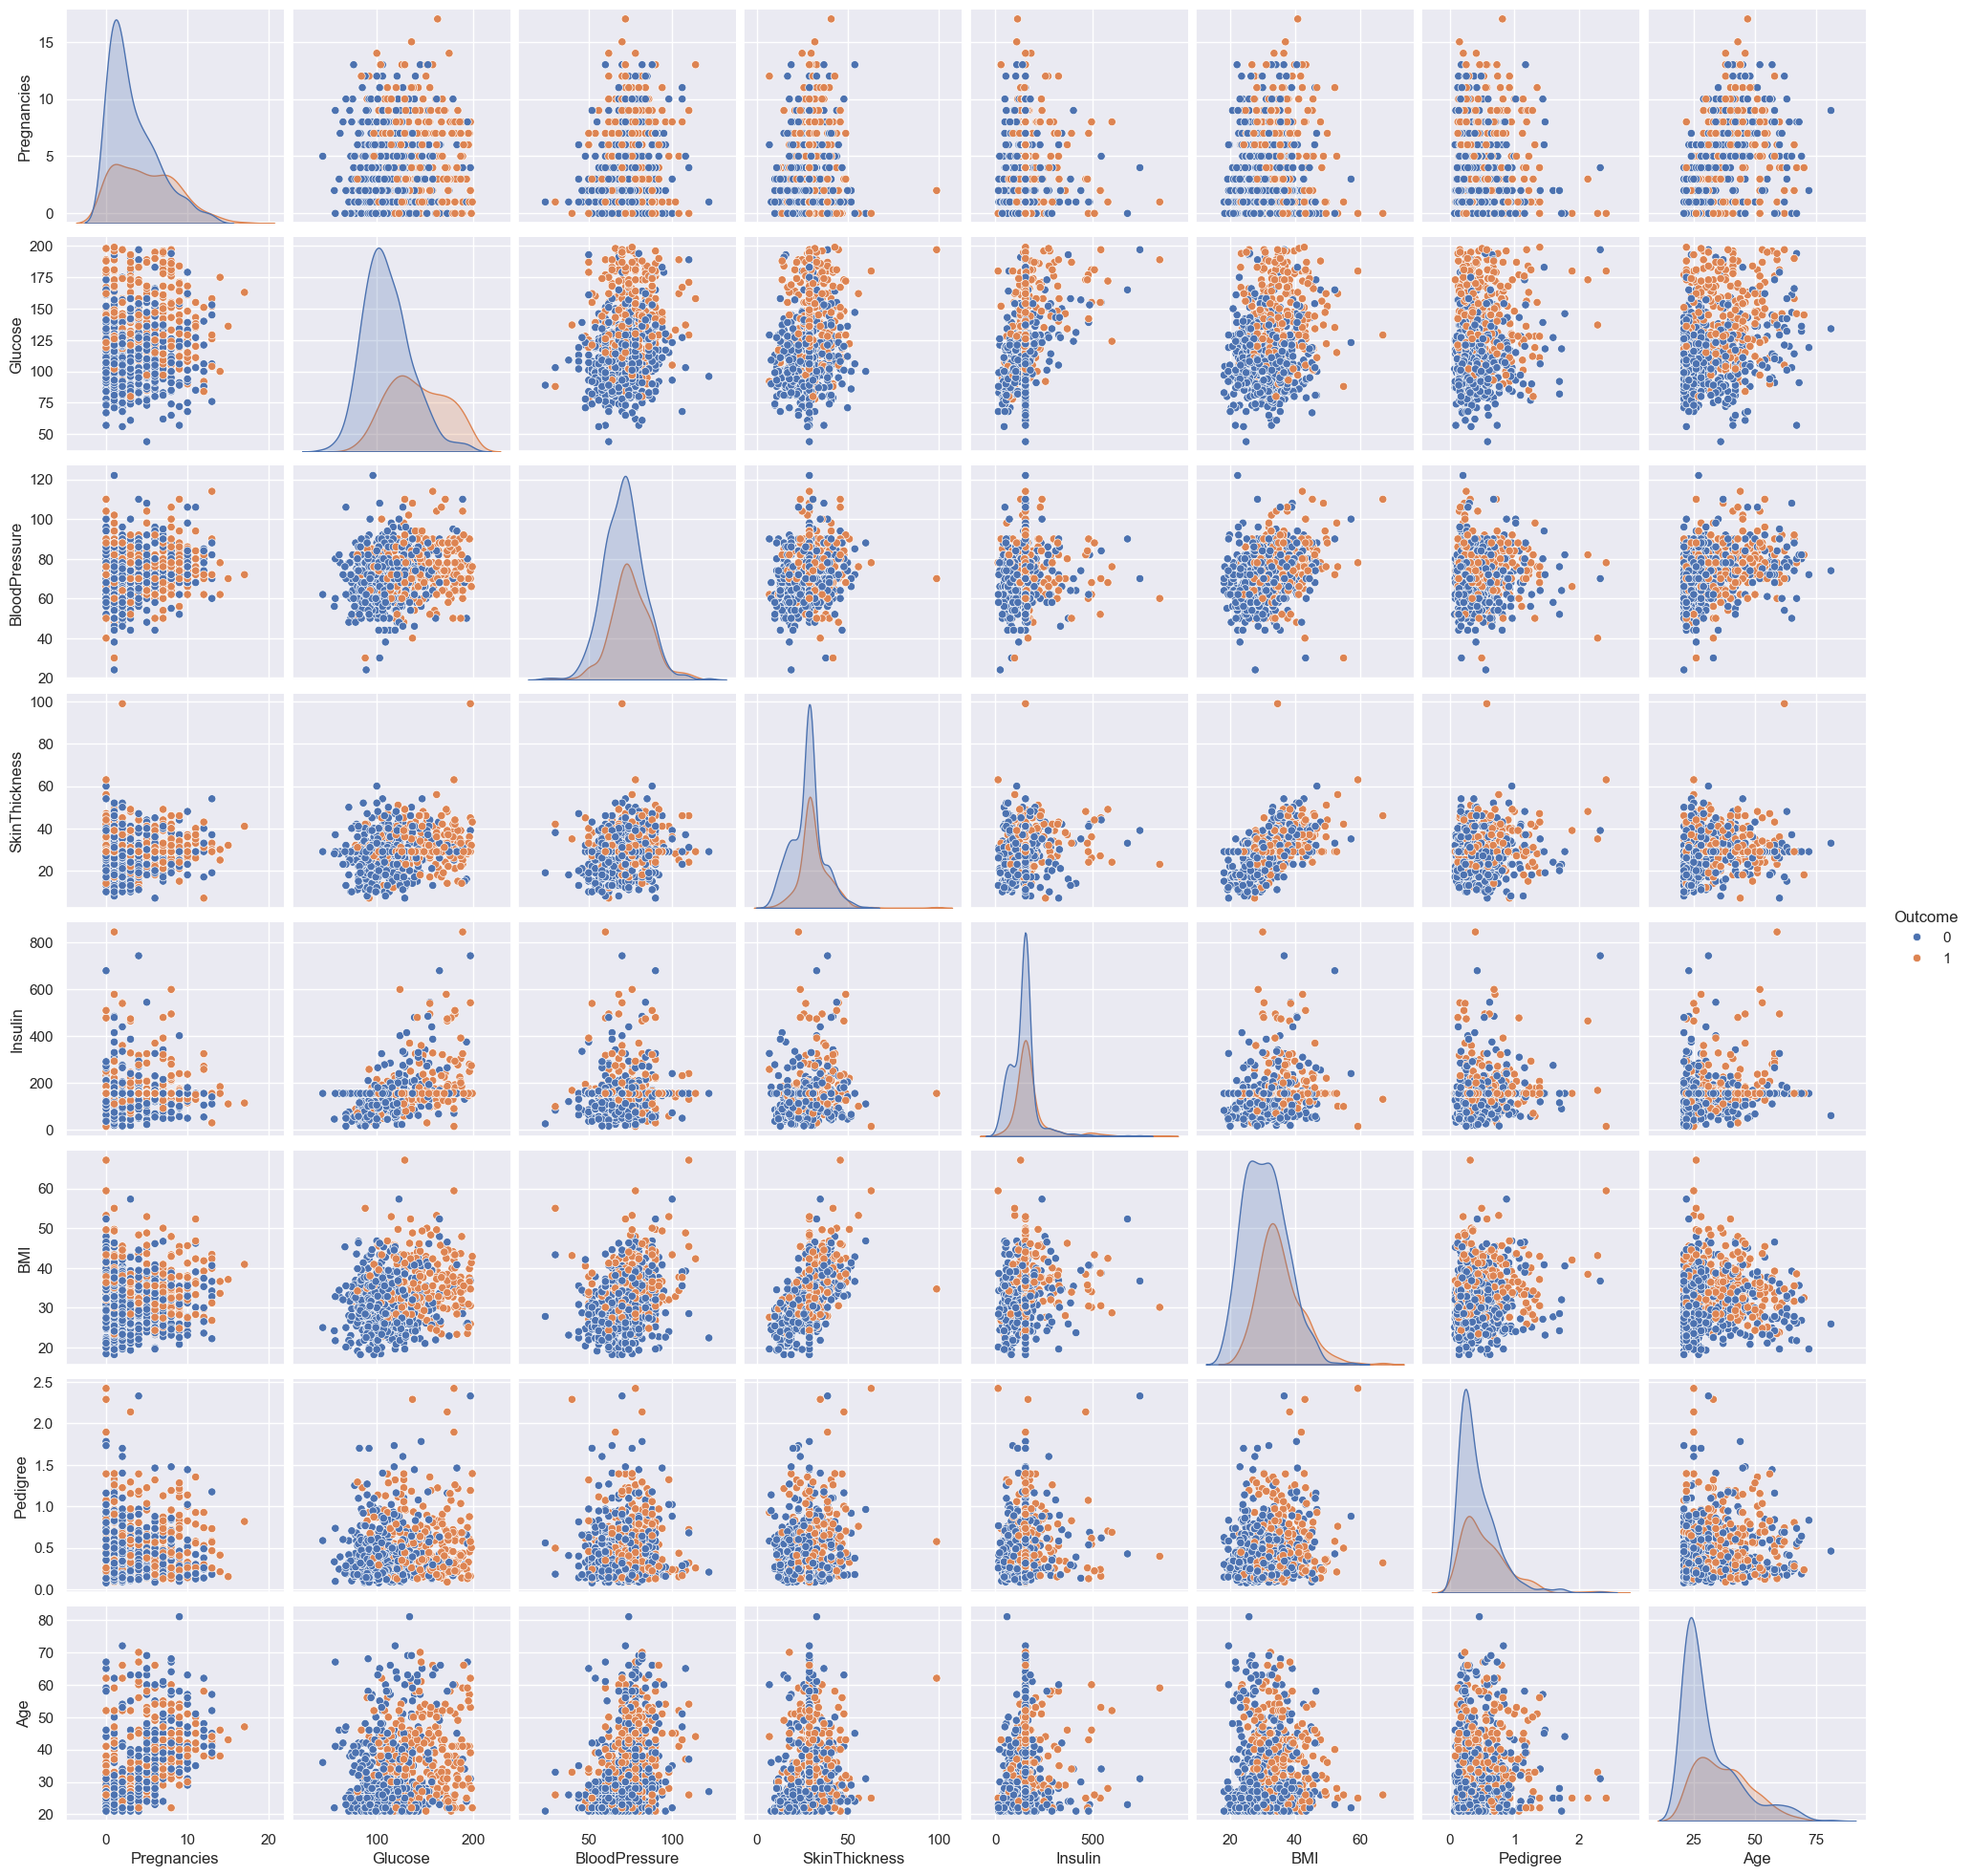

In [5]:
graph = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome']
sns.set()
sns.pairplot(data_clean[graph], hue='Outcome', diag_kind="kde")

### Feature Combination Testing

Test various combinations of features to find the best combination that yields the highest model accuracy using GridSearchCV.

In [6]:
all_comb = []
for i in range(1,len(data_clean)-1):
    for comb in combinations(data_clean.columns[:-1] , i):
        all_comb.append(np.asarray(comb))

In [7]:
parameters = {
    'n_neighbors': range(1,351),
    'weights': ['uniform', 'distance']
}

result=[]

# Result is saved as pickle : model_analysis.pickle
result = pickle.load(open('./model/model_analysis.pickle', 'rb'))

# for comb in all_comb:
#     q_cols = comb
#     df = data_clean[q_cols]
#     inputs = df[df.columns]
#     target = data_clean[data_clean.columns[-1]]    
#     x_train, x_test, y_train, y_test = train_test_split(
#         inputs,
#         target,
#         test_size=0.2,
#         random_state=365,
#         stratify=target
#     ) 
#     grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parameters,
#                           scoring='accuracy')
#     grid_search.fit(x_train, y_train)
#     result.append((comb,grid_search.best_score_))

Select the top performing model.

In [8]:
best_model = sorted(result, key=lambda tup: tup[1], reverse=True)[0]
best_model

(array(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='<U11'),
 0.7850459816073571)

In [9]:
df = data_clean[best_model[0]]
inputs = df[df.columns]
target = data_clean[data_clean.columns[-1]]
print(f'inputs: {inputs.shape} target: {target.shape}')

inputs: (768, 4) target: (768,)


## Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    target,
    test_size=0.2,
    random_state=365,
    stratify=target
)   

grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parameters,
                          scoring='accuracy')

grid_search.fit(x_train.values, y_train)
clf = grid_search.best_estimator_

print(f'For : {comb[0]} : {grid_search.best_params_} AND Best Score : {grid_search.best_score_}')
clf

For : Pregnancies : {'n_neighbors': 11, 'weights': 'uniform'} AND Best Score : 0.7850459816073571


KNeighborsClassifier(n_neighbors=11)

### Heat Map

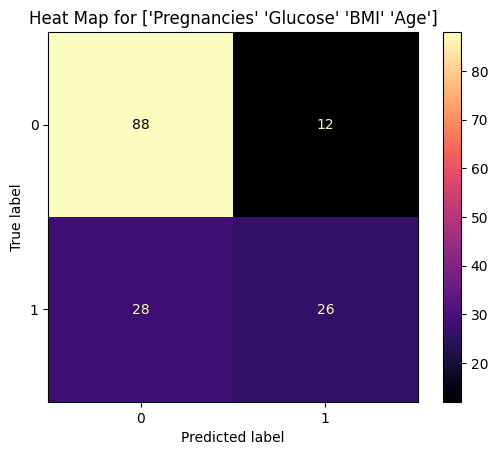

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [11]:
y_test_pred = clf.predict(x_test.values)
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
)
plt.title(f'Heat Map for {best_model[0]}')
plt.show()
print(classification_report(y_test, y_test_pred, target_names=['0','1']))

### Save KNN Classifier model as Pickle

In [12]:
pickle.dump(clf, open('./model/diabetes-model-knn.pickle','wb'))

### Predict

In [13]:
# array(['Pregnancies', 'Glucose', 'BMI', 'Age']
clf.predict([[0,50,50,15]])

# OUTPUT 0 => Not Diabetic
# OUTPUT 1 => Can be Diabetic

array([0])